In [ ]:
# path to data in my drive
path = '/content/drive/My Drive/Personal/Projects/bengaluru_real_estate_price_prediction/bengaluru_house_prices.csv'
!ls /content/drive/My\ Drive/Personal/Projects/bengaluru_real_estate_price_prediction


bengaluru_house_prices.csv  bengaluru_real_estate.ipynb


In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import  matplotlib

# Data Cleaning and Processing

In [ ]:
real_estate_df = pd.read_csv(path)
real_estate_df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
# To keep the model simple we keep the features: location, size, total_sqft, bath, and price
# And we drop the other columns
real_estate_df_shrunk = real_estate_df[['location', 'size', 'total_sqft', 'bath', 'price']]
real_estate_df_shrunk.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
real_estate_df_shrunk.shape

(13320, 5)

In [ ]:
#check for number of null values for each column
real_estate_df_shrunk.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
#Given we have about 13.3k datapoints and there are few rows with null values, we can drop the rows with null values for a simpler model.
real_estate_df_non_null = real_estate_df_shrunk.dropna()
real_estate_df_non_null.shape

(13246, 5)

In [ ]:
#check unique values in the size column
real_estate_df_non_null['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
# we create a new column bhk (number of bedrooms) that contains the number value from the size column
real_estate_df_non_null['bhk'] = real_estate_df_non_null['size'].apply(lambda x: int(x.split(' ')[0]))
real_estate_df_non_null.head(5)

<ipython-input-9-8b278c641b54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate_df_non_null['bhk'] = real_estate_df_non_null['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
#let's check the values of total_sqft
real_estate_df_non_null['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
#given the presence of values like 1133 - 1384, we create a check function to see if the value of total_sqft is a float
def is_float_value(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
#check if the values in total_sqft are float
real_estate_df_non_null[~real_estate_df_non_null['total_sqft'].apply(is_float_value)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


 total_sqft can also have range values. For this, we take the average of the range. Cases like 34.46Sq. Meter are dropped to keep things simple.

 **Note**: Such values can be converted to square ft using unit conversion.

In [ ]:
def convert_sqft_to_num(x): #method to calculate average of range
  numbers = x.split('-')
  if len(numbers) == 2:
    return (float(numbers[0]) + float(numbers[1]))/2
  try:
    return float(x) #converts the original value to float if possible and is not a range
  except:
    return None #returns None if the value is not a float and not a range

In [ ]:
#apply the convert_sqft_to_num function to the total_sqft column
real_estate_df_non_null['total_sqft'] = real_estate_df_non_null['total_sqft'].apply(convert_sqft_to_num)
#remove the null valued (in the modified total_sqft column) rows from the dataframe
real_estate_df_non_null = real_estate_df_non_null[real_estate_df_non_null.total_sqft.notnull()]
print(real_estate_df_non_null.shape)
print(real_estate_df_non_null.info())
real_estate_df_non_null.head(5)

<ipython-input-14-150ba750823d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate_df_non_null['total_sqft'] = real_estate_df_non_null['total_sqft'].apply(convert_sqft_to_num)


(13200, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   bhk         13200 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB
None


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
#Add new feature called price per square feet that will be used to remove outliers
# The prices are in 100000 rupees
real_estate_df_2 = real_estate_df_non_null.copy()
real_estate_df_2['price_per_sqft'] = real_estate_df_2['price']*100000/real_estate_df_2['total_sqft']
real_estate_df_2.head(5)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Location Analysis and Dimensionality Reduction

In [ ]:
real_estate_df_location = real_estate_df_2.copy()
real_estate_df_location['location'] = real_estate_df_location['location'].apply(lambda x: x.strip())  #remove the leading and trailing spaces
#create a dist plot for the location column and observe the distribution
location_dist = real_estate_df_location['location'].value_counts(ascending=False)
location_dist

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

<ipython-input-17-f9dff1b5cb1d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(location_dist_values)


<Axes: ylabel='Density'>

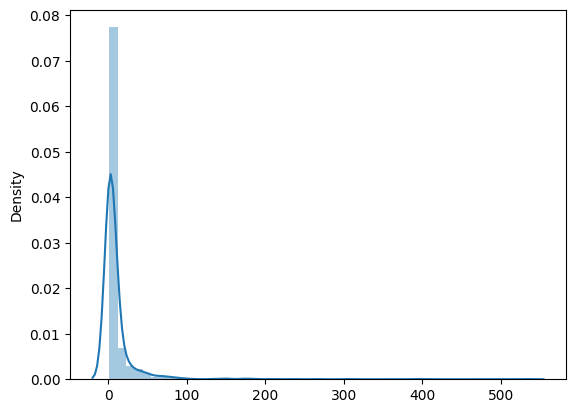

In [ ]:
#create a dist plot for location_dist
location_dist_values = location_dist.values

sns.distplot(location_dist_values)

Given a large number of locations don't have much datapoints, we need to apply dimensionality reduction technique here to reduce number of locations.

locations having less than 10 rows are tagged as "other" location. So, the number of categories is reduced by a lot. When using one hot encoding, it will help having fewer dummy columns.

In [ ]:
len(real_estate_df_location.location.unique()), len(location_dist[location_dist>10]), len(location_dist[location_dist<=10])

(1287, 240, 1047)

In [ ]:
#get locations with less than 10 datapoints
location_less_10 = location_dist[location_dist<=10]


In [ ]:
#replace the location value to 'other' where the number of datapoints for that location is less than 10
real_estate_df_location.location = real_estate_df_location.location.apply(lambda x: 'other' if x in location_less_10 else x)
len(real_estate_df_location.location.unique())

241

In [ ]:
real_estate_df_location.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Removal

Let's consider a normally square ft per bedroom is 300. So, an example of a 400 sqft apartment with 2 bhk seems suspicious and can be removed as an outlier. We remove such outliers by keeping a minimum thresold per bhk to be 300 sqft

In [ ]:
df_no_outlier = real_estate_df_location.copy()


In [ ]:
#let's check examples where per bhk sqft is less than 300
df_no_outlier[(df_no_outlier.total_sqft/df_no_outlier.bhk)<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [ ]:
df_no_outlier[(df_no_outlier.total_sqft/df_no_outlier.bhk)<300].shape

(744, 7)

The data contains inconsistencies. For example, a 6 bedroom apartment is listed with 1020 sqft, and another with 8 bedrooms has only 600 sqft total. It's likely these are errors and can be safely removed.

In [ ]:
df_no_outlier = df_no_outlier[~((df_no_outlier.total_sqft/df_no_outlier.bhk)<300)]
df_no_outlier.shape

(12456, 7)

In [ ]:
#let's oberseve the stats for price per sqft
df_no_outlier.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

The data reveals a significant price disparity per square foot, ranging from a minimum of 267 rupees to a maximum around 175,000 rupees. To address this variation, **we can identify and remove outliers within each location using the mean and standard deviation.** We keep properties for a particular location if the price per square foot is within 1 standard deviation of the mean.

In [ ]:
def remove_location_pps_outliers(df):
  #new dataframe with outliers removed
  new_df = pd.DataFrame()
  for key, loc_df in df.groupby('location'):
    mean = np.mean(loc_df.price_per_sqft)
    std = np.std(loc_df.price_per_sqft)
    reduced_df = loc_df[(loc_df.price_per_sqft>(mean-std)) & (loc_df.price_per_sqft<=(mean+std))]
    new_df = pd.concat([new_df,reduced_df],ignore_index=True)
  return new_df
df_no_outlier_2 = remove_location_pps_outliers(df_no_outlier)
df_no_outlier_2.shape


(10242, 7)

Let's consider another condition. **For the same location, the price of n bed apt should be greater than the mean of n-1 bed apt**

The datapoints failing to meet the condition are the outliers and will be removed.

So for a given location, we build a dictionary of stats of price per sqft per bhk, i.e.

{
    
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },

    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}


*Now we remove those n BHK apartments whose price_per_sqft is less than mean price_per_sqft of n-1 BHK apartment*

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [ ]:
df_no_outlier_3 = remove_bhk_outliers(df_no_outlier_2)
df_no_outlier_3.shape

(7317, 7)

For example, we consider *scatter plots* of price vs area for 2 bhk and 3 bhk apartments, for 2 locations: **Rajaji Nagar and Hebbal**. we consider both cases: with or without outliers.

In [ ]:


def plot_scatter_chart_area_price(df,location,title, ax):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    ax.scatter(bhk2.total_sqft,bhk2.price, marker='s', color='red',label='2 BHK', s=50)
    ax.scatter(bhk3.total_sqft,bhk3.price,marker='o', color='blue',label='3 BHK', s=50)
    ax.set_xlabel("Total Square Feet Area")
    ax.set_ylabel("Price (Lakh Indian Rupees)")
    ax.set_title(title)
    ax.legend()

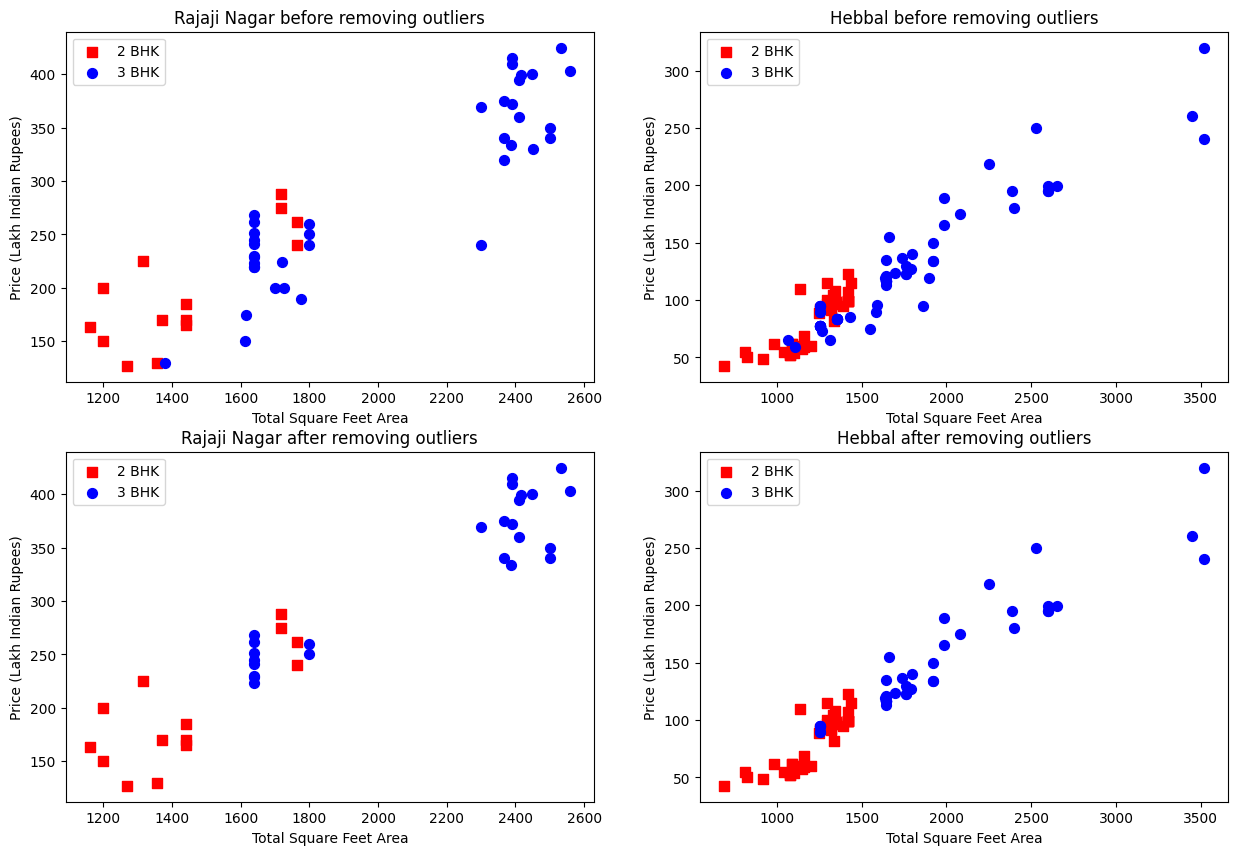

In [ ]:
fig,axes = plt.subplots(2,2)
plot_scatter_chart_area_price(df_no_outlier_2,"Rajaji Nagar",'Rajaji Nagar before removing outliers', axes[0,0])
plot_scatter_chart_area_price(df_no_outlier_2,"Hebbal",'Hebbal before removing outliers', axes[0,1])
plot_scatter_chart_area_price(df_no_outlier_3,"Rajaji Nagar",'Rajaji Nagar after removing outliers', axes[1,0])
plot_scatter_chart_area_price(df_no_outlier_3,"Hebbal",'Hebbal after removing outliers', axes[1,1])

We can see for Rajaji Nagar and  Hebbal some of the 3 BHK properties with per sqft price less than mean per sqft price of 2 BHK properties have been removed.

We now consider a condition where an apartment with n bhk should have no more than n+2 bathrooms. It would be quite *absurd* or *erroneous* to have apartments where for n bhks there are more than n+2 baths. Such apartments are thus considered outliers and are removed from the dataset.

In [ ]:
df_no_outlier_3[df_no_outlier_3.bath > df_no_outlier_3.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Listings like above where for n bhks there are greater than 2+n baths are quite unusual and hence removed as outliers.

In [ ]:
df_no_outlier_4 = df_no_outlier_3[df_no_outlier_3.bath < df_no_outlier_3.bhk + 2]
df_no_outlier_4.shape

(7239, 7)

In [ ]:
#we don't need the size and price_per_sqft columns and drop them
cleaned_df = df_no_outlier_4.drop(['size','price_per_sqft'],axis='columns')
cleaned_df.to_csv("/content/drive/My Drive/Personal/Projects/bengaluru_real_estate_price_prediction/bengaluru_housing_cleaned.csv", index=False)

# References

- https://www.youtube.com/playlist?list=PLeo1K3hjS3uu7clOTtwsp94PcHbzqpAdg
- https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data/data
- https://github.com/codebasics/py/tree/master/DataScience/BangloreHomePrices
- https://github.com/codebasics/py/blob/master/DataScience/BangloreHomePrices/model/banglore_home_prices_final.ipynb
